# Project 1   Covid Data Analysis  by Nitish Chauhan
Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common 
cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease
 COVID-19 - World Health Organization
The number of new cases are increasing day by day around the world. 
This dataset has information from the states and union territories of India at daily level.

Acknowledgements
* Thanks to Indian Ministry of Health & Family Welfare for making the data available to general public.

Task1.
1. analyze covid 19 data and take insights from this data and write your report what you have taken out from it.

Task2.
* Show a beautiful pie chart of top seven states that have been affected by corona virus 
          1. Top seven states where active cases have been reported maximum
          2. Top seven states where cured cases have been reported maximum
          3. Top seven states where death cases have been reported maximum

Database Link :   https://www.mohfw.gov.in/data/datanew.json

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
covid_data=pd.read_json("https://www.mohfw.gov.in/data/datanew.json")

In [34]:
data=covid_data.drop(36,axis=0)

In [35]:
data.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,9,7641,7503,129,9,7641,7503,129,35
1,1,Andhra Pradesh,6453,2059708,2038960,14295,6193,2060040,2039545,14302,28
2,3,Arunachal Pradesh,183,54964,54501,280,170,54980,54530,280,12
3,4,Assam,3458,605944,596547,5939,3482,606263,596837,5944,18
4,5,Bihar,46,726021,716314,9661,44,726021,716316,9661,10


In [36]:
data.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
31,34,Telangana,4056,668722,660730,3936,3979,668833,660917,3937,36
32,33,Tripura,102,84299,83381,816,100,84305,83389,816,16
33,35,Uttarakhand,179,343739,336163,7397,177,343747,336173,7397,05
34,36,Uttar Pradesh,133,1710014,1686984,22897,129,1710019,1686992,22898,09
35,37,West Bengal,7513,1579463,1552997,18953,7445,1579906,1553498,18963,19


In [59]:
data.isnull().head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [38]:
data.shape

(36, 11)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sno           36 non-null     int64 
 1   state_name    36 non-null     object
 2   active        36 non-null     int64 
 3   positive      36 non-null     int64 
 4   cured         36 non-null     int64 
 5   death         36 non-null     int64 
 6   new_active    36 non-null     int64 
 7   new_positive  36 non-null     int64 
 8   new_cured     36 non-null     int64 
 9   new_death     36 non-null     int64 
 10  state_code    36 non-null     object
dtypes: int64(9), object(2)
memory usage: 3.4+ KB


In [40]:
data.describe()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death
count,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000
mean,19.277778,5600.888889,9.459326e+05,9.277767e+05,12555.000000,5440.166667,9.463255e+05,9.283264e+05,12559.000000
std,10.843329,16678.791917,1.409612e+06,1.376146e+06,24029.282581,16067.575115,1.410459e+06,1.377314e+06,24034.667404
min,1.000000,1.000000,7.641000e+03,7.503000e+03,4.000000,0.000000,7.641000e+03,7.503000e+03,4.000000
25%,10.750000,113.500000,8.392800e+04,8.265825e+04,819.000000,110.500000,8.395325e+04,8.268850e+04,819.000000
50%,19.500000,228.000000,4.752035e+05,4.641870e+05,5537.000000,227.500000,4.752155e+05,4.642065e+05,5539.500000
75%,28.250000,3607.500000,1.012787e+06,9.991878e+05,13751.250000,3606.250000,1.012887e+06,9.993508e+05,13753.000000
max,37.000000,95349.000000,6.588429e+06,6.415316e+06,139734.000000,91478.000000,6.589982e+06,6.416998e+06,139760.000000


# 1. Top seven states where active cases have been reported maximum

In [41]:
covid_active_data=data.sort_values(by=["active"],ascending=False)

In [42]:
covid_active_data.head(7)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
16,18,Kerala,95349,4838811,4716728,26734,91478,4846766,4728497,26791,32
20,22,Maharashtra,33379,6588429,6415316,139734,33224,6589982,6416998,139760,27
30,32,Tamil Nadu,15238,2684641,2633534,35869,15022,2685874,2634968,35884,33
23,25,Mizoram,13316,111651,97955,380,12776,112599,99440,383,15
15,17,Karnataka,9700,2982869,2935238,37931,9537,2983133,2935659,37937,29
35,37,West Bengal,7513,1579463,1552997,18953,7445,1579906,1553498,18963,19
1,1,Andhra Pradesh,6453,2059708,2038960,14295,6193,2060040,2039545,14302,28


In [43]:
x=covid_active_data["state_name"].head(7)
y=covid_active_data["active"].head(7)

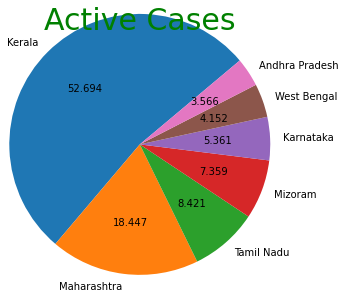

In [44]:
plt.pie(y , labels=x  ,  radius=1.5, startangle=40 ,autopct='%.3f' )
plt.title("Active Cases" , color = "g" , fontsize = 30)
plt.show()

# 2. Top seven states where cured cases have been reported maximum

In [45]:
data.head(2)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,9,7641,7503,129,9,7641,7503,129,35
1,1,Andhra Pradesh,6453,2059708,2038960,14295,6193,2060040,2039545,14302,28


In [46]:
covid_cured_data=data.sort_values(by=["cured"],ascending=False)

In [47]:
covid_cured_data.head(7)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
20,22,Maharashtra,33379,6588429,6415316,139734,33224,6589982,6416998,139760,27
16,18,Kerala,95349,4838811,4716728,26734,91478,4846766,4728497,26791,32
15,17,Karnataka,9700,2982869,2935238,37931,9537,2983133,2935659,37937,29
30,32,Tamil Nadu,15238,2684641,2633534,35869,15022,2685874,2634968,35884,33
1,1,Andhra Pradesh,6453,2059708,2038960,14295,6193,2060040,2039545,14302,28
34,36,Uttar Pradesh,133,1710014,1686984,22897,129,1710019,1686992,22898,09
35,37,West Bengal,7513,1579463,1552997,18953,7445,1579906,1553498,18963,19


In [48]:
x=covid_cured_data["state_name"].head(7)
y=covid_cured_data["cured"].head(7)

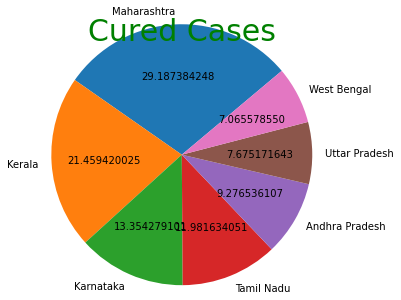

In [49]:
plt.pie(y , labels=x  ,  radius=1.5, startangle=40 ,autopct='%.9f' )
plt.title("Cured Cases" , color = "g" , fontsize = 30)
plt.show()

# 3. Top seven states where death cases have been reported maximum

In [50]:
data.head(2)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,9,7641,7503,129,9,7641,7503,129,35
1,1,Andhra Pradesh,6453,2059708,2038960,14295,6193,2060040,2039545,14302,28


In [51]:
covid_death_data=data.sort_values(by=["death"],ascending=False)

In [52]:
covid_death_data.head(7)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
20,22,Maharashtra,33379,6588429,6415316,139734,33224,6589982,6416998,139760,27
15,17,Karnataka,9700,2982869,2935238,37931,9537,2983133,2935659,37937,29
30,32,Tamil Nadu,15238,2684641,2633534,35869,15022,2685874,2634968,35884,33
16,18,Kerala,95349,4838811,4716728,26734,91478,4846766,4728497,26791,32
8,10,Delhi,327,1439337,1413921,25089,326,1439358,1413943,25089,07
34,36,Uttar Pradesh,133,1710014,1686984,22897,129,1710019,1686992,22898,09
35,37,West Bengal,7513,1579463,1552997,18953,7445,1579906,1553498,18963,19


In [53]:
x=covid_death_data["state_name"].head(7)
y=covid_death_data["death"].head(7)

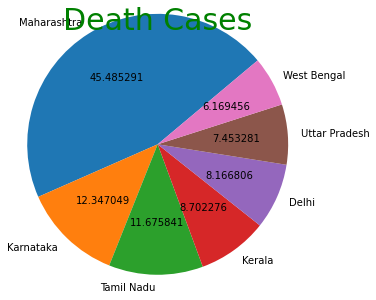

In [54]:
plt.pie(y , labels=x  ,  radius=1.5, startangle=40 ,autopct='%2f' )
plt.title("Death Cases" , color = "g" , fontsize = 30)
plt.show()

# Total cases in india

In [62]:
x=covid_data["state_name"]
y=covid_data["active"]

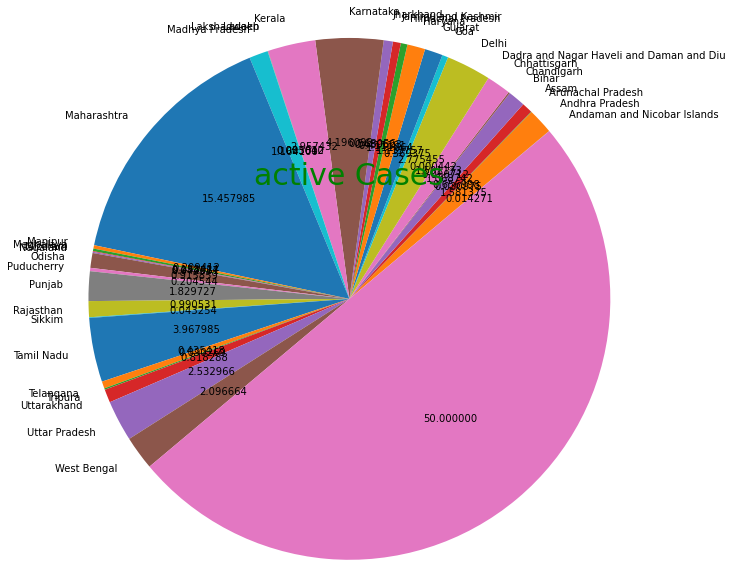

In [64]:
plt.pie(y , labels=x  ,  radius=3, startangle=40 ,autopct='%2f' )
plt.title("active Cases" , color = "g" , fontsize = 30)
plt.show()